In [1]:
import numpy as np
import pandas as pd
import os
print(os.listdir("./input"))

['testimages', 'fer2013.csv', '.DS_Store', 'myimage']


In [2]:
filname = './input/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('./input/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [4]:
# get the data
filname = './input/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('./input/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


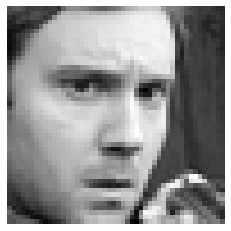

In [5]:
#transform the input pixels to see how the first image looks
import pandas as pd
raw_data_csv_file_name = './input/fer2013.csv'
raw_data = pd.read_csv(raw_data_csv_file_name)

import numpy as np
img = raw_data["pixels"][0] # first image
val = img.split(" ")
x_pixels = np.array(val, 'float32')
x_pixels /= 255
x_reshaped = x_pixels.reshape(48,48)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(x_reshaped, cmap= "gray", interpolation="nearest")    
plt.axis("off")
plt.show()

In [8]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [9]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [11]:
len(Y)

35887

In [10]:
print(X)
print(Y)

[[0.2745098  0.31372549 0.32156863 ... 0.41568627 0.42745098 0.32156863]
 [0.59215686 0.58823529 0.57647059 ... 0.75686275 0.71764706 0.72156863]
 [0.90588235 0.83137255 0.61176471 ... 0.34509804 0.43137255 0.59607843]
 ...
 [0.06666667 0.06666667 0.0627451  ... 0.60392157 0.52156863 0.44313725]
 [0.11764706 0.10980392 0.10980392 ... 0.1372549  0.11764706 0.10980392]
 [0.0745098  0.05098039 0.05490196 ... 0.74117647 0.78039216 0.78823529]]
[0 0 2 ... 0 3 2]


In [11]:
# keras with tensorflow backend
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [13]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

In [14]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    
    return model
model=my_model()
model.summary()

2022-06-03 17:59:01.040359: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       4

In [15]:
# save model at this location after each epoch
path_model='model_filter.h5' 
tf.keras.backend.clear_session()

#K.tensorflow_backend.clear_session() 
# destroys the current graph and builds a new one

# create the model
model=my_model() 

#K.set_value(model.optimizer.lr,1e-3) # set the learning rate
tf.keras.backend.set_value(model.optimizer.lr,1e-3)

# fit the model
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Epoch 1/20
505/505 [==============================] - 1092s 2s/step - loss: 1.6823 - accuracy: 0.3438 - val_loss: 1.6346 - val_accuracy: 0.3391
Epoch 2/20
505/505 [==============================] - 1276s 3s/step - loss: 1.3278 - accuracy: 0.4942 - val_loss: 1.3388 - val_accuracy: 0.4923
Epoch 3/20
505/505 [==============================] - 1261s 2s/step - loss: 1.1282 - accuracy: 0.5768 - val_loss: 1.2253 - val_accuracy: 0.5375
Epoch 4/20
505/505 [==============================] - 1151s 2s/step - loss: 1.0065 - accuracy: 0.6228 - val_loss: 1.1667 - val_accuracy: 0.5578
Epoch 5/20
505/505 [==============================] - 1287s 3s/step - loss: 0.8865 - accuracy: 0.6720 - val_loss: 1.0639 - val_accuracy: 0.6035
Epoch 6/20
505/505 [==============================] - 1047s 2s/step - loss: 0.7473 - accuracy: 0.7278 - val_loss: 1.2364 - val_accuracy: 0.5773
Epoch 7/20
505/505 [==============================] - 1008s 2s/step - loss: 0.5907 - accuracy: 0.7852 - val_loss: 1.2201 - val_accuracy:

In [43]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)

113/113 [==============================] - 26s 227ms/step - loss: 2.2863 - accuracy: 0.6180


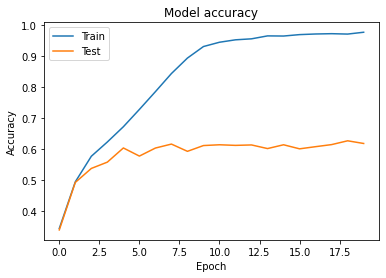

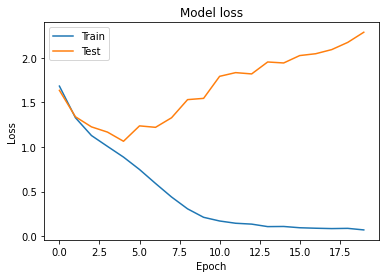

In [59]:
#graph that shows a relationship between epoch and loss, accuracy
import matplotlib.pyplot as plt

# 훈련 과정 시각화 (정확도)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 훈련 과정 시각화 (손실)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
path_model

'model_filter.h5'

In [66]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [50]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [55]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

113/113 [==============================] - 27s 238ms/step


(3589, 7)

<AxesSubplot:>

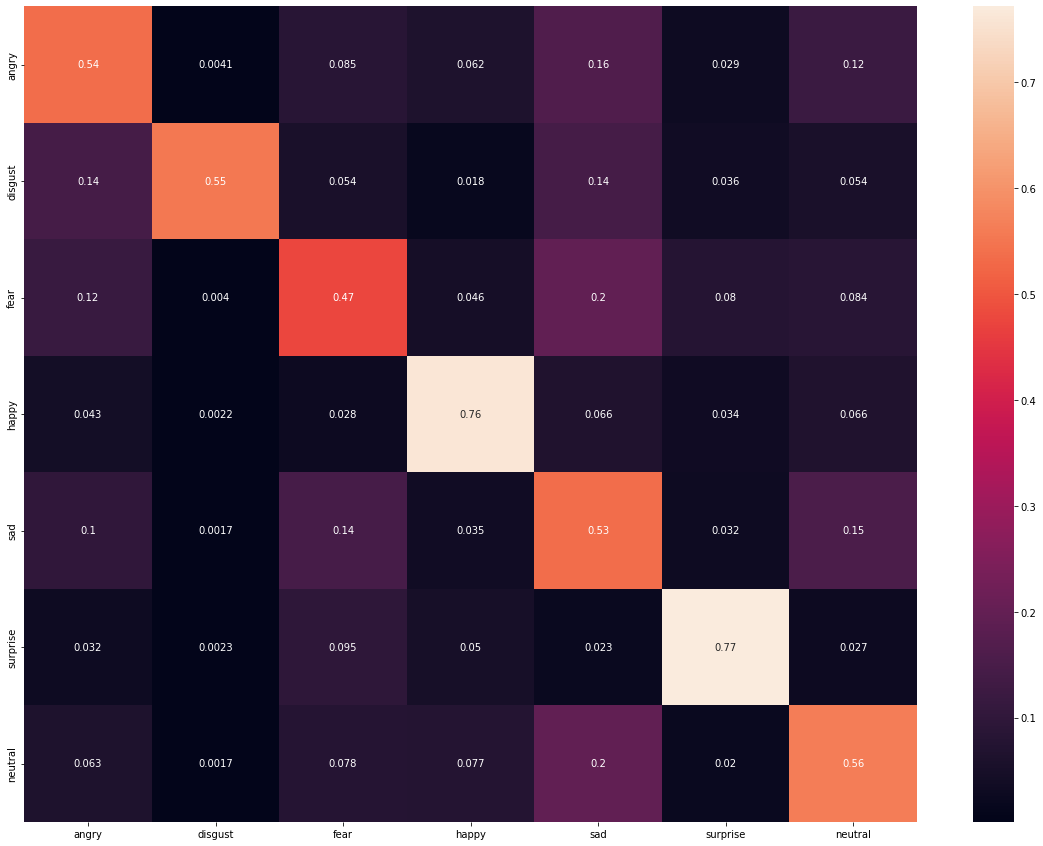

In [20]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
%matplotlib inline
y_pred_class = np.argmax(y_pred,axis=1)
cm = confusion_matrix(np.where(y_test == 1)[1], y_pred_class)
y_test[np.where(y_test >= 3)]

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in objects],
                  columns = [i for i in objects])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

In [23]:
import tensorflow as tf
final_model = tf.keras.models.load_model('model_filter.h5')

**Real Time Expression Prediction**

1/1 [==============================] - 0s 46ms/step


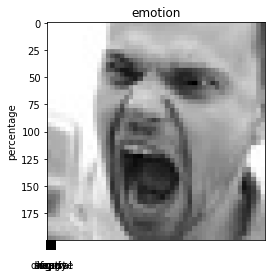

Expression Prediction: angry


In [70]:
from skimage import io
from keras.preprocessing import image
img = tf.keras.preprocessing.image.load_img('./input/myimage/man_angry.jpeg', grayscale=True, target_size=(48, 48)) 
show_img=tf.keras.preprocessing.image.load_img('./input/myimage/man_angry.jpeg', grayscale=False, target_size=(200, 200))

# x = tf.keras.preprocessing.image.array_to_img(img) 
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])

1/1 [==============================] - 0s 53ms/step


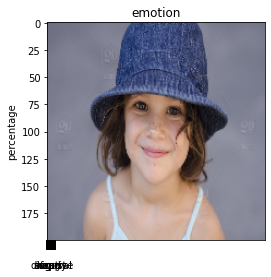

Expression Prediction: happy


In [69]:
from skimage import io
img = tf.keras.preprocessing.image.load_img('./input/testimages/girl_smile.jpeg', grayscale=True, target_size=(48, 48))
show_img=tf.keras.preprocessing.image.load_img('./input/testimages/girl_smile.jpeg', grayscale=False, target_size=(200, 200))
x = tf.keras.preprocessing.image.img_to_array(img) #img_to_array
x = np.expand_dims(x, axis = 0)
x /= 255

custom = model.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i
        
print('Expression Prediction:',objects[ind])